# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Ridhan Al Aufar
- **Email:** ridhan783@gmail.com
- **ID Dicoding:** ridhann_4

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda berubah dari waktu ke waktu?
2. Apakah cuaca tertentu memiliki pengaruh signifikan terhadap penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [81]:
!unzip Bike-sharing-dataset.zip

Archive:  Bike-sharing-dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [82]:
df = pd.read_csv("day.csv", delimiter=",")

### Assessing Data

In [83]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [84]:
df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit' : 'weather',
                   'workingday' : 'working_day', 'hum' : 'humidity', 'casual' : 'casual_user',
                   'registered' : 'registered_user','cnt' : 'total_user'}, inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          731 non-null    int64  
 1   date             731 non-null    object 
 2   season           731 non-null    int64  
 3   year             731 non-null    int64  
 4   month            731 non-null    int64  
 5   holiday          731 non-null    int64  
 6   weekday          731 non-null    int64  
 7   working_day      731 non-null    int64  
 8   weather          731 non-null    int64  
 9   temp             731 non-null    float64
 10  atemp            731 non-null    float64
 11  humidity         731 non-null    float64
 12  windspeed        731 non-null    float64
 13  casual_user      731 non-null    int64  
 14  registered_user  731 non-null    int64  
 15  total_user       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [86]:
# Change the data type of the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   date             731 non-null    datetime64[ns]
 2   season           731 non-null    int64         
 3   year             731 non-null    int64         
 4   month            731 non-null    int64         
 5   holiday          731 non-null    int64         
 6   weekday          731 non-null    int64         
 7   working_day      731 non-null    int64         
 8   weather          731 non-null    int64         
 9   temp             731 non-null    float64       
 10  atemp            731 non-null    float64       
 11  humidity         731 non-null    float64       
 12  windspeed        731 non-null    float64       
 13  casual_user      731 non-null    int64         
 14  registered_user  731 non-null    int64    

In [87]:
df.describe()

,instant,season,year,month,holiday,weekday,working_day,weather,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [88]:
df.isnull().sum()

#There is no empty data

instant            0
date               0
season             0
year               0
month              0
holiday            0
weekday            0
working_day        0
weather            0
temp               0
atemp              0
humidity           0
windspeed          0
casual_user        0
registered_user    0
total_user         0
dtype: int64

In [89]:
df.duplicated().sum()

# there is no duplicated data

0

## Exploratory Data Analysis (EDA)

### Explore ...

In [90]:
# Analysis of monthly bicycle usage
monthly_total_users = df.groupby('month')['total_user'].sum()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_total_users.index = month_names

print (monthly_total_users)

January      134933
February     151352
March        228920
April        269094
May          331686
June         346342
July         344948
August       351194
September    345991
October      322352
November     254831
December     211036
Name: total_user, dtype: int64


In [91]:
# Analyze of seasonal bicycle use
seasonal_total_users = df.groupby('season')['total_user'].sum()
seasonal_total_users.rename({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
print(seasonal_total_users)

season
Spring     471348
Summer     918589
Fall      1061129
Winter     841613
Name: total_user, dtype: int64


In [92]:
# Analyze of bicycle usage based on weather
weather_total_users = df.groupby('weather')['total_user'].sum()
weather_total_users.rename({1: 'Clear with Few Clouds', 2: 'Foggy and Overcast', 3: 'Light Rain or Snow',}, inplace=True)
print(weather_total_users)

weather
Clear with Few Clouds    2257952
Foggy and Overcast        996858
Light Rain or Snow         37869
Name: total_user, dtype: int64


In [93]:
# Correlation between variables
df.corr(numeric_only = True)

,instant,season,year,month,holiday,weekday,working_day,weather,temp,atemp,humidity,windspeed,casual_user,registered_user,total_user
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
year,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
month,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
working_day,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weather,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


## Visualization & Explanatory Analysis

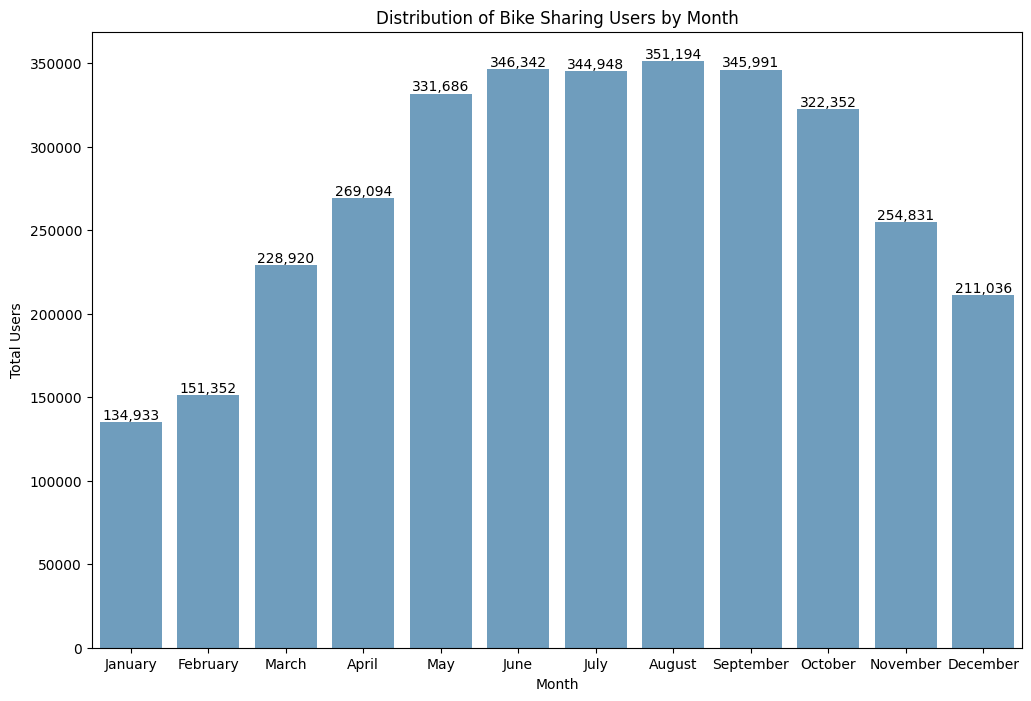

In [94]:
# Barplot of Distribution of Bike Sharing Users by Month
plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_total_users.index, y=monthly_total_users.values, estimator=sum, errorbar=None, alpha = 0.7)

for index, value in enumerate(monthly_total_users.values):
    plt.text(index, value, '{:,.0f}'.format(value), ha='center', va='bottom')

plt.title('Distribution of Bike Sharing Users by Month')
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.show()

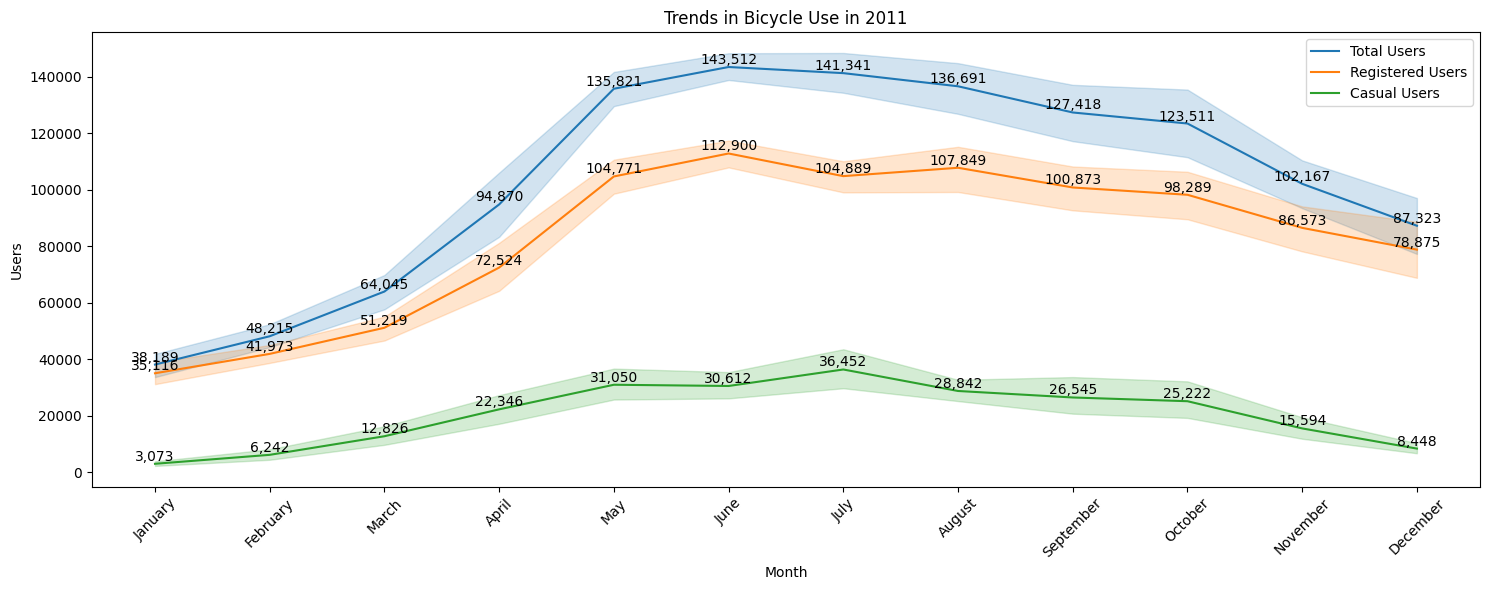

In [95]:
plt.figure(figsize=(15, 6))

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Visualization of bicycle usage trends by month for 2011
sns.lineplot(x='month', y='total_user', data=df[df['year'] == 0], estimator=sum, label='Total Users')
sns.lineplot(x='month', y='registered_user', data=df[df['year'] == 0], estimator=sum, label='Registered Users')
sns.lineplot(x='month', y='casual_user', data=df[df['year'] == 0], estimator=sum, label='Casual Users')
plt.title('Trends in Bicycle Use in 2011')
plt.xlabel('Month')
plt.ylabel('Users')
plt.xticks(range(1, 13), month_names, rotation=45)

# Add text labels with the values of each line
for line in plt.gca().lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, '{:,.0f}'.format(y), ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

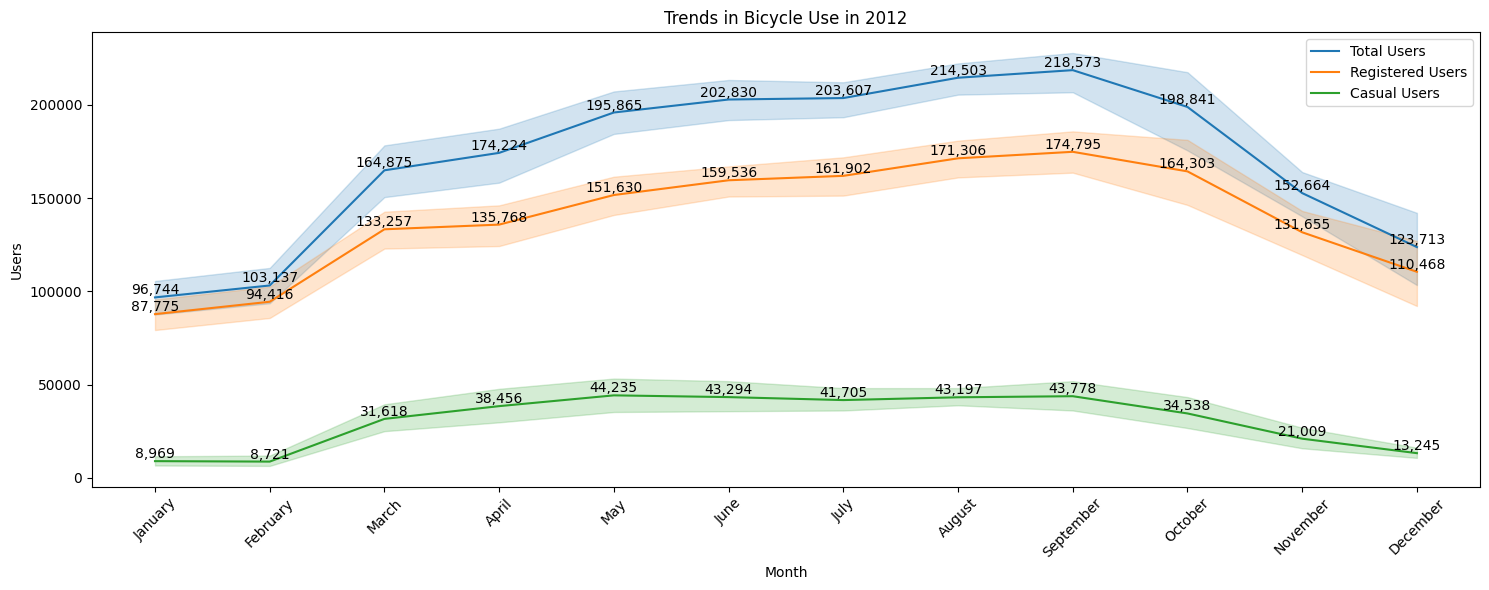

In [96]:
plt.figure(figsize=(15, 6))

# Visualization of bicycle usage trends by month for 2012
sns.lineplot(x='month', y='total_user', data=df[df['year'] == 1], estimator=sum, label='Total Users')
sns.lineplot(x='month', y='registered_user', data=df[df['year'] == 1], estimator=sum, label='Registered Users')
sns.lineplot(x='month', y='casual_user', data=df[df['year'] == 1], estimator=sum, label='Casual Users')
plt.title('Trends in Bicycle Use in 2012')
plt.xlabel('Month')
plt.ylabel('Users')
plt.xticks(range(1, 13), month_names, rotation=45)

# Add text labels with the values of each line
for line in plt.gca().lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, '{:,.0f}'.format(y), ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

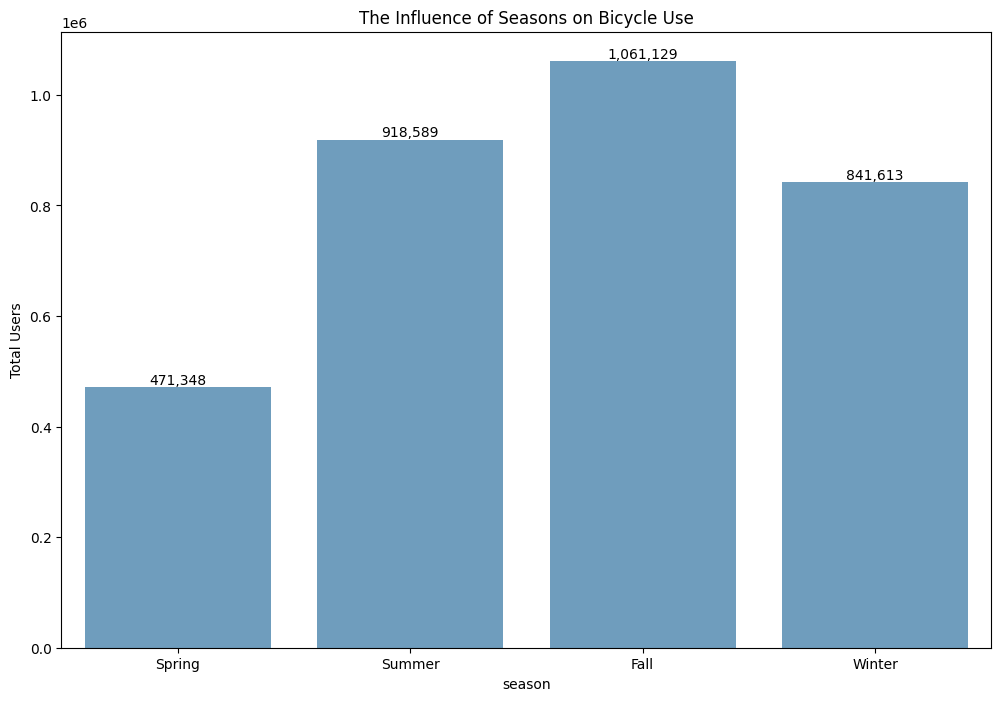

In [97]:
# Barplot of The Influence of Seasons on Bicycle Use
plt.figure(figsize=(12, 8))
sns.barplot(x='season', y='total_user', data=df, estimator=sum, errorbar=None, alpha = 0.7)

for index, value in enumerate(df.groupby('season')['total_user'].sum()):
    plt.text(index, value, '{:,.0f}'.format(value), ha='center', va='bottom')

plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('The Influence of Seasons on Bicycle Use')
plt.ylabel('Total Users')
plt.show()

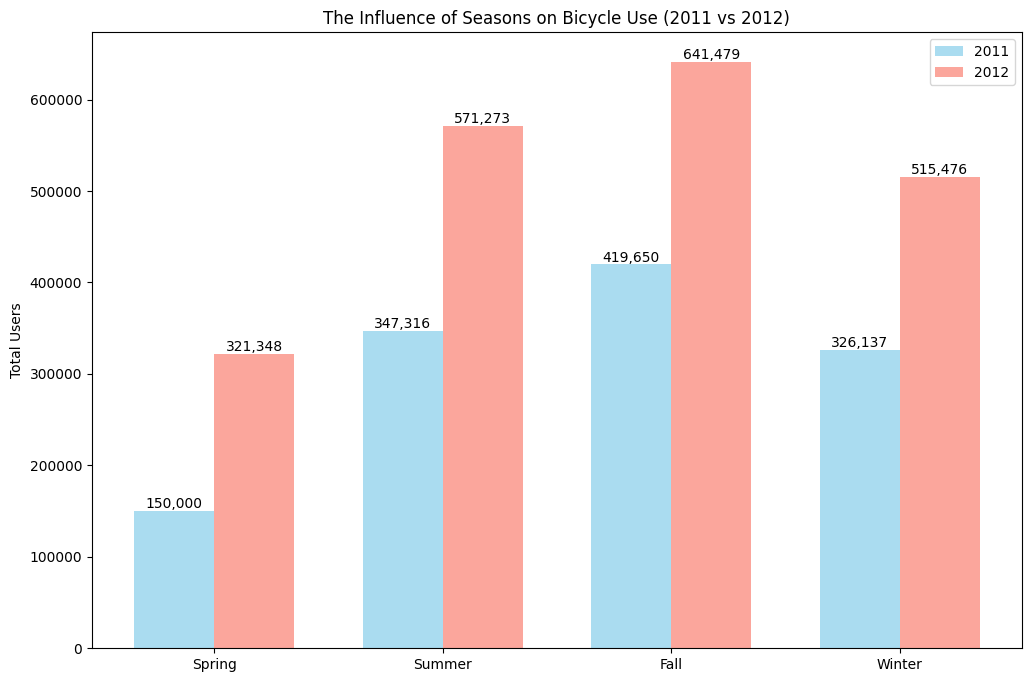

In [98]:
# Calculate the total users for each season in each year
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_total_users_2011 = df[df['year'] == 0].groupby('season')['total_user'].sum()
seasonal_total_users_2012 = df[df['year'] == 1].groupby('season')['total_user'].sum()

# Set the width for each bar
bar_width = 0.35

# Set the position for each bar
r1 = np.arange(len(seasons))
r2 = [x + bar_width for x in r1]

# Plot barplots for each year
plt.figure(figsize=(12, 8))
plt.bar(r1, seasonal_total_users_2011, color='skyblue', width=bar_width, label='2011', alpha=0.7)
plt.bar(r2, seasonal_total_users_2012, color='salmon', width=bar_width, label='2012', alpha=0.7)

# Add text labels with the values of each bar
for i, value in enumerate(seasonal_total_users_2011):
    plt.text(i, value, '{:,.0f}'.format(value), ha='center', va='bottom', color='black')
for i, value in enumerate(seasonal_total_users_2012):
    plt.text(i + bar_width, value, '{:,.0f}'.format(value), ha='center', va='bottom', color='black')

plt.xticks([r + bar_width/2 for r in range(len(seasons))], seasons)
plt.title('The Influence of Seasons on Bicycle Use (2011 vs 2012)')
plt.ylabel('Total Users')
plt.legend()
plt.show()


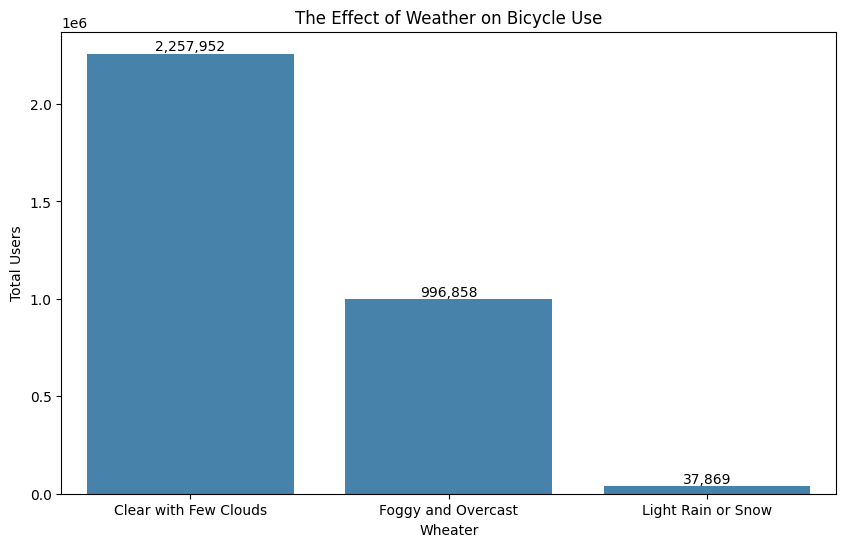

In [99]:
# Barplot of The influence of weather on bicycle use
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='total_user', data=df, estimator=sum, errorbar=None, alpha = 0.9)

for index, value in enumerate(df.groupby('weather')['total_user'].sum()):
    plt.text(index, value, '{:,.0f}'.format(value), ha='center', va='bottom')

plt.xticks(ticks=[0, 1, 2], labels=['Clear with Few Clouds', 'Foggy and Overcast', 'Light Rain or Snow'])
plt.title('The Effect of Weather on Bicycle Use')
plt.xlabel('Wheater')
plt.ylabel('Total Users')
plt.show()

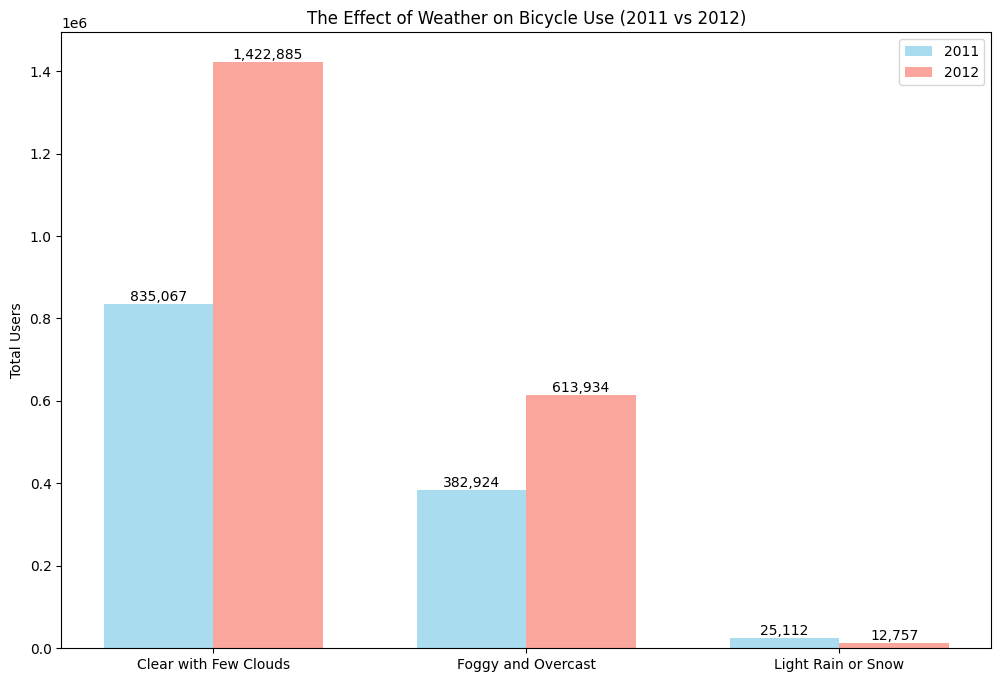

In [104]:
# Calculate the total users for each weather in each year
weathers = ['Clear with Few Clouds', 'Foggy and Overcast', 'Light Rain or Snow']
weathers_total_users_2011 = df[df['year'] == 0].groupby('weather')['total_user'].sum()
weathers_total_users_2012 = df[df['year'] == 1].groupby('weather')['total_user'].sum()

# Set the width for each bar
bar_width = 0.35

# Set the position for each bar
r1 = np.arange(len(weathers))
r2 = [x + bar_width for x in r1]

# Plot barplots for each year
plt.figure(figsize=(12, 8))
plt.bar(r1, weathers_total_users_2011, color='skyblue', width=bar_width, label='2011', alpha=0.7)
plt.bar(r2, weathers_total_users_2012, color='salmon', width=bar_width, label='2012', alpha=0.7)

# Add text labels with the values of each bar
for i, value in enumerate(weathers_total_users_2011):
    plt.text(i, value, '{:,.0f}'.format(value), ha='center', va='bottom', color='black')
for i, value in enumerate(weathers_total_users_2012):
    plt.text(i + bar_width, value, '{:,.0f}'.format(value), ha='center', va='bottom', color='black')

plt.xticks([r + bar_width/2 for r in range(len(weathers))], weathers)
plt.title('The Effect of Weather on Bicycle Use (2011 vs 2012)')
plt.ylabel('Total Users')
plt.legend()
plt.show()


### Pertanyaan 1:

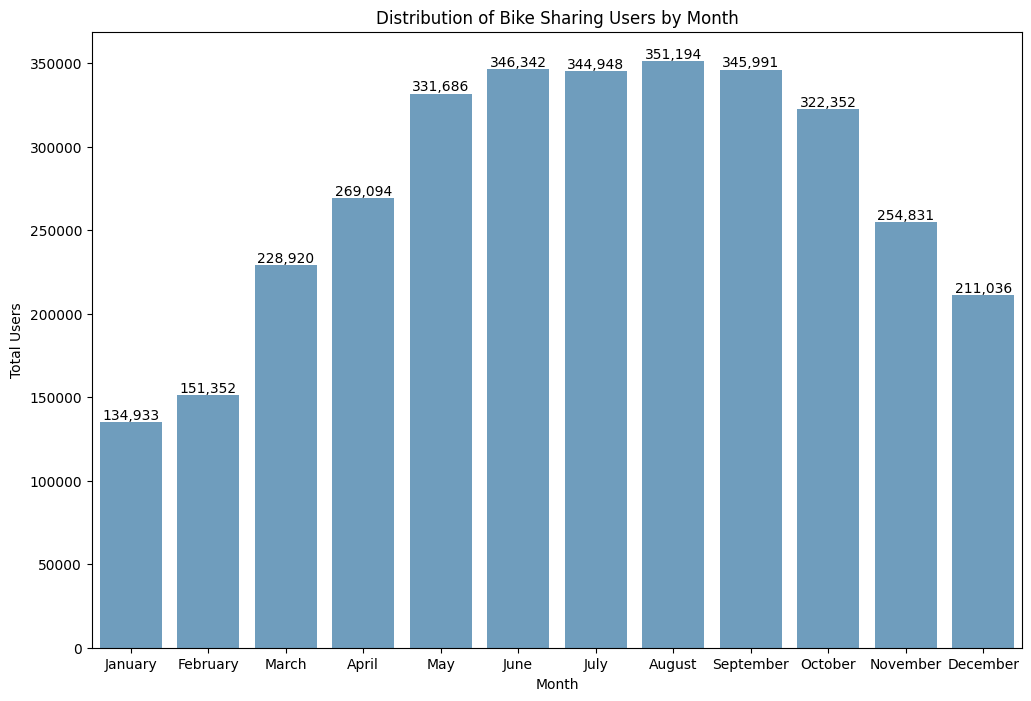

In [101]:
# Barplot of Distribution of Bike Sharing Users by Month
plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_total_users.index, y=monthly_total_users.values, estimator=sum, errorbar=None, alpha = 0.7)

for index, value in enumerate(monthly_total_users.values):
    plt.text(index, value, '{:,.0f}'.format(value), ha='center', va='bottom')

plt.title('Distribution of Bike Sharing Users by Month')
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.show()

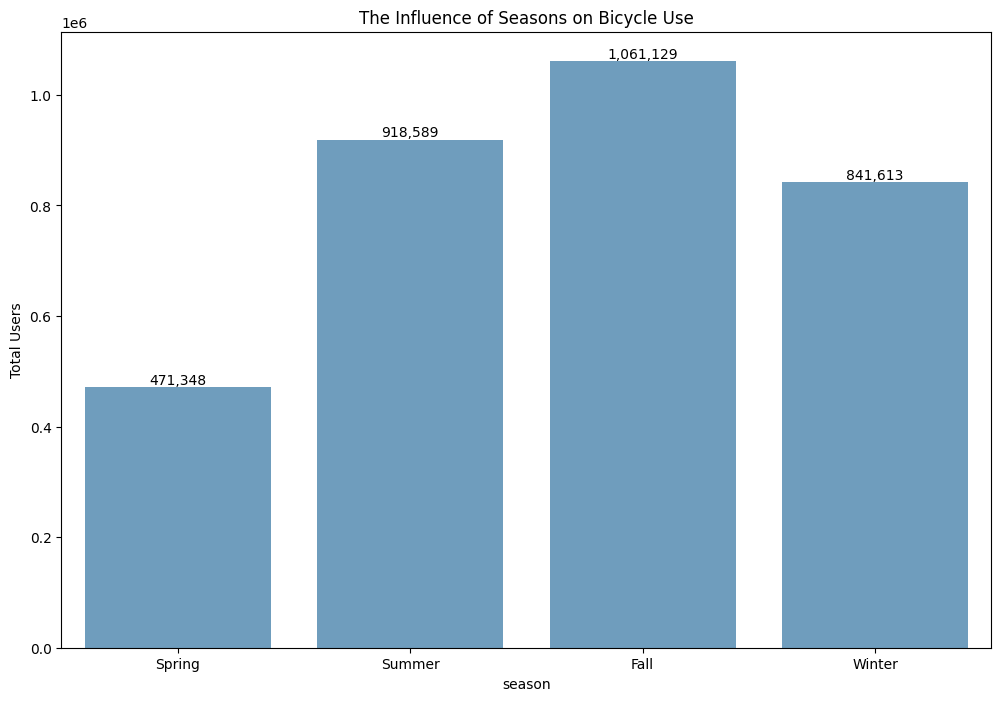

In [102]:
# Barplot of The Influence of Seasons on Bicycle Use
plt.figure(figsize=(12, 8))
sns.barplot(x='season', y='total_user', data=df, estimator=sum, errorbar=None, alpha = 0.7)

for index, value in enumerate(df.groupby('season')['total_user'].sum()):
    plt.text(index, value, '{:,.0f}'.format(value), ha='center', va='bottom')

plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('The Influence of Seasons on Bicycle Use')
plt.ylabel('Total Users')
plt.show()

### Pertanyaan 2:

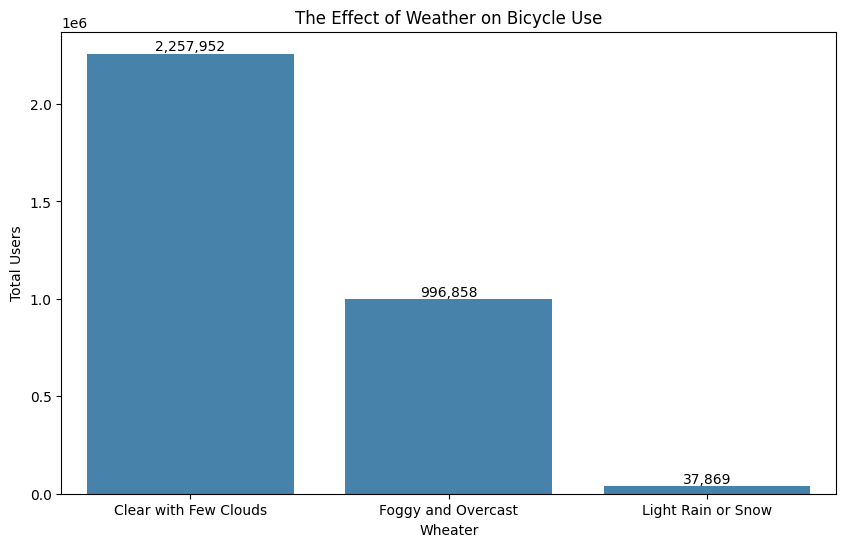

In [103]:
# Barplot of The influence of weather on bicycle use
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='total_user', data=df, estimator=sum, errorbar=None, alpha = 0.9)

for index, value in enumerate(df.groupby('weather')['total_user'].sum()):
    plt.text(index, value, '{:,.0f}'.format(value), ha='center', va='bottom')

plt.xticks(ticks=[0, 1, 2], labels=['Clear with Few Clouds', 'Foggy and Overcast', 'Light Rain or Snow'])
plt.title('The Effect of Weather on Bicycle Use')
plt.xlabel('Wheater')
plt.ylabel('Total Users')
plt.show()

## Conclusion

1. Bagaimana pola penggunaan sepeda berubah dari waktu ke waktu? Pada hasil data visualisasi diatas dapat disimpulkan bahwa :
  - Musim Panas (Summer) adalah periode dengan penggunaan sepeda tertinggi, dengan total pengguna mencapai 918,589. Hal ini terjadi pada bulan Juni, Juli, dan Agustus. Puncak tertinggi terjadi pada bulan Agustus dengan total pengguna sebanyak 351,194.
  - Musim Semi (Spring) juga menunjukkan peningkatan dalam penggunaan sepeda, dengan total pengguna sebanyak 471,348. Hal ini terjadi pada bulan Maret, April, dan Mei. Bulan Mei menunjukkan penggunaan sepeda yang cukup tinggi dengan total 331,686.
  - Musim Gugur (Fall) memiliki total pengguna sepeda mencapai 1,061,129, yang menunjukkan bahwa penggunaan sepeda tetap tinggi meskipun sedikit menurun dari musim panas. Hal ini terjadi pada bulan September, Oktober, dan November. Bulan September menjadi bulan dengan penggunaan sepeda tertinggi, hampir menyamai penggunaan pada bulan Agustus.
  - Musim Dingin (Winter) menunjukkan penurunan signifikan dalam penggunaan sepeda, dengan total pengguna sebanyak 841,613. Hal ini terjadi pada bulan Desember, Januari, dan Februari. Bulan Januari menjadi bulan dengan penggunaan sepeda yang paling rendah, dengan total 134,933.




2. Apakah cuaca tertentu memiliki pengaruh signifikan terhadap penggunaan sepeda? Ya, cuaca memiliki pengaruh yang cukup signifikan terhadap pengguna dalam melakukan peminjaman sepeda. Dari data yang diberikan, dapat ditarik beberapa kesimpulan terkait pengaruh cuaca terhadap penggunaan sepeda:
  - Penggunaan Sepeda Lebih Tinggi pada Cuaca Cerah: Dengan total pengguna sebanyak 2,257,952, cuaca yang jelas dengan sedikit awan (Clear with Few Clouds) menjadi kondisi cuaca yang paling umum saat orang menggunakan sepeda. Hal ini menunjukkan bahwa penggunaan sepeda cenderung lebih tinggi saat cuaca cerah.
  - Penggunaan Sepeda cukup Rendah pada Cuaca yang berkabut dan mendung (Foggy and Overcast). Pada cuaca ini memiliki total pengguna sebanyak 996,858, yang merupakan lebih rendah dari cuaca cerah.
  - Penggunaan Sepeda Sangat Rendah pada Hujan Ringan atau Salju bahkan cuaca buruk (Light Rain or Snow) memiliki total pengguna yang sangat rendah, hanya sebanyak 37,869. Hal ini menunjukkan bahwa kondisi cuaca yang tidak mendukung seperti hujan atau salju secara signifikan mengurangi minat orang untuk menggunakan sepeda.


